# DB 04 Many to many relationships 1

## Many to many relationships

### 개요

#### Many to many relationships
##### N:M or M:N
한 테이블의 0개 이상의 레코드가 다른 테이블의 O개 이상의 레코드와 관련된 경우
- `양쪽 모두에서 N:1 관계를 가짐

#### M:N 관계의 역할과 필요성 이해하기
- '병원 진료 시스템 모델 관계'를 만들며 M:N 관계의 역할과 필요성 이해하기
- 환자와 의사 2개의 모델을 사용하여 모델 구조 구상하기

- > 제공된 '99-mtm-practice' 프로젝트를 기반으로 진행

### N:1 의 한계

#### 의사와 환자 간 모델 관계 설정
- 한 명의 의사에게 여려 환자가 예약할 수 있도록 설계
```py
# hospitals/models.py 

class Doctor (models.Model): 
    name = models.TextField() 
    
    def __str__(self): 
        return f'(self.pk}번 의사 [self.name]' 
        

class Patient (models.Model): 
    doctor = models.ForeignKey(Doctor, on_delete=models.CASCADE) 
    name = models.TextField() 
    
    def __str__(self): return f'(self.pk] 번 환자 [self.name}'
```
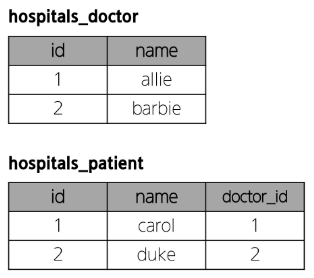
- 2명의 의사와 환자를 생성하고 환자는 서로 다른 의사에게 예약
```py
doctor1 = Doctor.objects.create(name='allie') 
doctor2 = Doctor.objects.create(name='barbie')
patient1 = Patient.objects.create(name='carol', doctor=doctor1) 
patient2 = Patient.objects.create(name='duke', doctor doctor2)

doctor1 
<Doctor: 1번 의사 allie>

doctor2 
<Doctor: 2번 의사 barbie> 

patient1 
<Patient: 1번 환자 carol> 

patient2 
<Patient: 2번 환자 duke>
```

#### N:1의 한계 상황
- 1번 환자(carol)가 두 의사 모두에게 진료를 받고자 한다면 환자 테이블에 1번 환자 데이터가 중복으로 입력될 수 밖에 없음
  
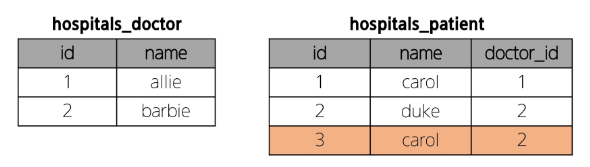

- 동시에 예약을 남길 수는 없을까?
```py
patient4 = Patient.objects.create(name='carol', doctor=doctor1, doctor2) 
File "<ipython-input-9-6edaf3ffb4e6>", line 1 
    patient4 = Patient.objects.create(name='carol', doctor=doctor1, doctor2) 
                                                                    ^
SyntaxError: positional argument follows keyword argument
```
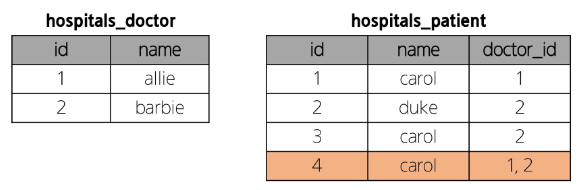

- 동일한 환자지만 다른 의사에게도 진료 받기 위해 예약하기 위해서는 객체를 하나 더 만들어 진행해야 함
- 외래 키 컬럼에 '1, 2' 형태로 저장하는 것은 DB 타입 문제로 불가능ㄴ

- > 예약 테이블을 따로 만들자

### 중개 모델

#### 1. 예약 모델 생성
- 환자 모델의 외래 키를 삭제하고 별도의 예약 모델을 새로 생성
- 예약 모델은 의사와 환자에게 각각 N:1 관계를 가짐
```py
# hospitals/models.py 

#외래 키 삭제 
class Patient (models. Model): 
    name = models.TextField() 
    
    def _str_(self): 
        return f'(self.pk]번 환자 [self.name}' 
        
#중개모델 작성 
class Reservation(models.Model): 
    doctor = models.Foreignkey(Doctor, on_delete-models.CASCADE) 
    patient = models.Foreignkey(Patient, on_delete-models.CASCADE) 
    
    def __str_(self): 
        return f'{self.doctor_id}번 의사의 {self.patient_id}번 환자'
```

#### 2. 예약 데이터 생성
- 데이터베이스 초기화 후 Migration 진행 및 shell_plus 실행
- 의사와 환자 생성 후 예약 만들기
```py
doctor1 = Doctor.objects.create(name='allie') 
patient1 = Patient.objects.create(name='carol') 

Reservation.objects.create(doctor=doctor1, patient=patient1)
```
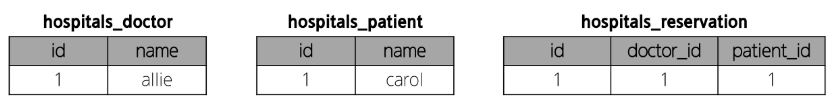

#### 3. 예약 정보 조회
- 의사와 환자가 예약 모델을 통해 각각 본인의 진료 내역 확인
```py
# 의사 -> 예약 정보 찾기 
doctor1.reservation_set.all() 
<QuerySet [<Reservation: 1번 의사의 1번 환자>]> 

# 환자 > 예약 정보 찾기 
patient1.reservation_set.all() 
<QuerySet [<Reservation: 1번 의사의 1번 환자>]
```

#### 4. 추가 예약 생성
- 1번 의사에게 새로운 환자 예약 생성
```py
patient2 = Patient.objects.create(name='duke') 

Reservation.objects.create(doctor=doctor1, patient=patient2)
```
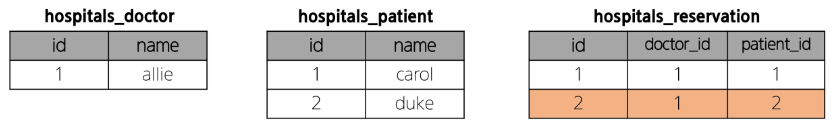

#### 5. 예약 정보 조회
- 1번 의사의 예약 정보 조회
```py
#의사 -> 환자 목록 
doctor1.reservation_set.all() Confidential 
<QuerySet [<Reservation: 1번 의사의 1번 환자>, <Reservation: 1번 의사의 2번 환자>]>
```

####  Django에서는
`ManyToManyField`로 중개모델을 자동으로 생성

### ManyToManyField

#### ManyToManyField()
M:N 관계 설정 모델 필드

#### Django ManyToManyField
- 환자 모델에 ManyToManyField 작성
    - 의사 모델에 작성해도 상관 없으며 참조/역참조 관계만 잘 기억할 것
```py
# hospitals/models.py 

class Patient (models.Model): 
    # ManyToManyField 작성 
    doctors = models.ManyToManyField(Doctor) 
    name = models.TextField() 
    
    def __str__(self): 
        return f'{self.pk}번 환자 {self.name}' 
        
# Reservation Class 주석 처리
```

### 'through' argument

## ManyToManyField

## 좋아요 기능 구현

### 모델 관계 설정

### 기능 구현